In [10]:
from google.colab import drive ; drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
def prepare_country_stats(oecd , gdp_percapita):
  """
This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data.
  """
  oecd = oecd[oecd["INEQUALITY"] == "TOT"] ## Only Take Column  with TOT inequality
  oecd = oecd.pivot(index = "Country",columns = "Indicator" , values = "Value") # Here's Link Can help you out # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html
  
  # Rename and merging
  gdp_percapita.rename(columns = {"2015" : "GDP per capita"} , inplace = True) # {"Old name : New name" }
  gdp_percapita.set_index("Country" , inplace = True)
  
  full_country_stats = pd.merge(left = oecd , right = gdp_percapita ,
                                left_index = True , right_index = True , how ="inner")
  full_country_stats.sort_values(by = "GDP per capita" , inplace = True , ascending = False )
  
  # Removing Indices 
  remove_indices = [0 , 1 ,6 , 8, 33 , 34 ,35] # No idea why author remove thos rows/ i guess he want to randomize every cluster
  keep_indices = list(set(range(36)) - set(remove_indices)) # only making sure that remove_indices is removed

  return full_country_stats[["GDP per capita","Life satisfaction"]].iloc[keep_indices]

(3292, 17) (190, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3292 entries, 0 to 3291
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               3292 non-null   object 
 1   Country                3292 non-null   object 
 2   INDICATOR              3292 non-null   object 
 3   Indicator              3292 non-null   object 
 4   MEASURE                3292 non-null   object 
 5   Measure                3292 non-null   object 
 6   INEQUALITY             3292 non-null   object 
 7   Inequality             3292 non-null   object 
 8   Unit Code              3292 non-null   object 
 9   Unit                   3292 non-null   object 
 10  PowerCode Code         3292 non-null   int64  
 11  PowerCode              3292 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  3292 non-null

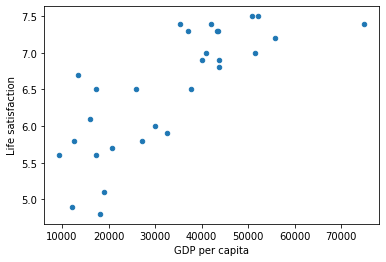

[[6.0674857]]


In [78]:
import matplotlib.pyplot as plt # Visualization
import pandas as pd # DataFrame Manipulation
import numpy as np
pd.set_option("max_columns",None)
from sklearn.linear_model import LinearRegression  # LinReg Model

# Load The data
oecd = pd.read_csv("/content/drive/My Drive/DataSet/oecd_bli_2015.csv") 
gdp_percapita = pd.read_csv("/content/drive/My Drive/DataSet/gdp_per_capita.csv",delimiter = "\t" , thousands="," , na_values = "n/a")
# (Row , Column)
print(oecd.shape , gdp_percapita.shape)

# Let's See The data
print(oecd.info())
print("\n\n",gdp_percapita.info())

## Prepare the data
country_stats = prepare_country_stats(oecd,gdp_percapita)
X = country_stats["GDP per capita"].values.reshape(-1,1) ## <<- My Favorite ,before shape (x,) to (x,1)
X = np.c_[country_stats["GDP per capita"]] ## Used By Author
y = np.c_[country_stats["Life satisfaction"]]

# Visualize Data
country_stats.plot(kind = "scatter" , x = "GDP per capita" , y = "Life satisfaction")
plt.show()

# Fit Linear Model
model = LinearRegression().fit(X,y) 

# Make A prediction
X_new =[[22587]]
print(model.predict(X_new)) # [[6.0674857]] <<-- I dont know why different , author [[5.96242338]]
